In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
import utils
import cleaning
import analysis

In [2]:
imdb = pd.read_csv(os.path.join('zippedData', 'imdb.title.basics.csv.gz'), index_col=0)
imdb

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [3]:
imdb.info()
imdb.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [4]:
imdb.drop(index=imdb.query('start_year > 2019').index, inplace=True)
imdb['start_year'].describe()

count    145081.000000
mean       2014.580441
std           2.688429
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2019.000000
Name: start_year, dtype: float64

In [5]:
cleaning.nan_info(imdb)

,Total,Percent
runtime_minutes,30765,21.205396
genres,5359,3.693799
original_title,20,0.013785
primary_title,0,0.000000
start_year,0,0.000000


<AxesSubplot:>

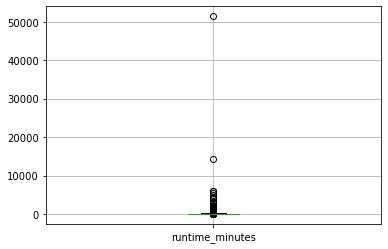

In [6]:
imdb.boxplot('runtime_minutes')

In [7]:
cleaning.outlier_info(imdb)

,Total,Percent
runtime_minutes,6825,4.704269
start_year,0,0.000000


array([[<AxesSubplot:title={'center':'runtime_minutes'}>]], dtype=object)

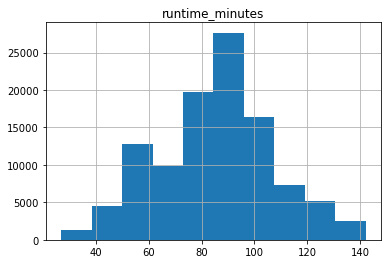

In [8]:
runtime_outliers = cleaning.find_outliers(imdb.runtime_minutes)
imdb.loc[runtime_outliers, 'runtime_minutes'] = np.nan
imdb.hist('runtime_minutes')

In [9]:
imdb.loc[:, 'runtime_minutes'].fillna(imdb.runtime_minutes.mean(), inplace=True)
imdb.drop(columns=['original_title'], inplace=True)
imdb.dropna(subset=['genres'], inplace=True)
imdb.rename(columns={'primary_title': 'title', 'start_year': 'release_year'}, inplace=True)
imdb.insert(1, 'clean_title', imdb.loc[:, 'title'].transform(cleaning.process_strings))
imdb

,title,clean_title,release_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,sunghursh,2013,85.091198,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,one day before the rainy season,2019,114.000000,"Biography,Drama"
tt0069049,The Other Side of the Wind,the other side of the wind,2018,122.000000,Drama
tt0069204,Sabse Bada Sukh,sabse bada sukh,2018,85.091198,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,the wandering soap opera,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916428,The Secret of China,the secret of china,2019,85.091198,"Adventure,History,War"
tt9916538,Kuambil Lagi Hatiku,kuambil lagi hatiku,2019,123.000000,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,rodolpho teophilo o legado de um pioneiro,2015,85.091198,Documentary


In [10]:
display(imdb[imdb.duplicated()])
imdb.drop_duplicates(inplace=True)

,title,clean_title,release_year,runtime_minutes,genres
tconst,,,,,
tt10127292,Plushtubers: The Apocalypse,plushtubers the apocalypse,2019,85.091198,"Action,Adventure"
tt10224422,Olanda,olanda,2019,85.091198,Documentary
tt10230042,Rok Sako To Rok Lo,rok sako to rok lo,2018,85.091198,Comedy
tt10230622,Aitebaar,aitebaar,2017,80.000000,Comedy
tt10230624,Huway Hum Jin Kay Liye Barbaad,huway hum jin kay liye barbaad,2017,85.091198,Comedy
...,...,...,...,...,...
tt9660588,3. Elma,3 elma,2014,65.000000,Drama
tt9688944,Um fio de esperança: independência ou guerra n...,um fio de esperanca independencia ou guerra no...,2017,94.000000,Documentary
tt9773302,3. Elma,3 elma,2014,65.000000,Drama


In [11]:
imdb['genres'] = imdb.loc[:, 'genres'].str.split(',')
imdb[['genres']]

,genres
tconst,
tt0063540,"[Action, Crime, Drama]"
tt0066787,"[Biography, Drama]"
tt0069049,[Drama]
tt0069204,"[Comedy, Drama]"
tt0100275,"[Comedy, Drama, Fantasy]"
...,...
tt9916428,"[Adventure, History, War]"
tt9916538,[Drama]
tt9916622,[Documentary]


<AxesSubplot:ylabel='genres'>

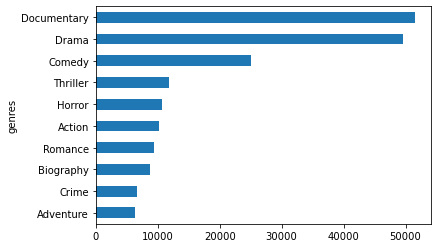

In [12]:
imdb_genre_freq = imdb.explode('genres').groupby('genres')['genres'].count()
imdb_genre_freq.sort_values().tail(10).plot.barh()

In [13]:
imdb_genre_combos = analysis.expl_combo_table(imdb, 'genres')
imdb_genre_combos

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tt0066787,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tt0069049,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tt0069204,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tt0100275,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916428,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
tt9916538,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tt9916622,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

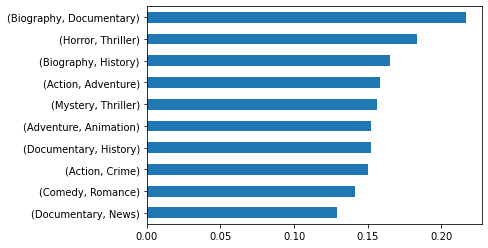

In [14]:
imdb_genre_corr = analysis.pairwise_corr(imdb_genre_combos)
imdb_genre_corr.sort_values().tail(10).plot.barh()

In [15]:
# tmdb = pd.read_csv(os.path.join('zippedData', 'tmdb.movies.csv.gz'), index_col=0)
# tmdb_genres = pd.read_csv(os.path.join('zippedData', 'tmdb.genres.csv'), squeeze=True, index_col=0)
# tmdb_genres = tmdb_genres.to_dict()
# tmdb.dropna(inplace=True)
# tmdb['genre_ids'] = cleaning.coerce_list_likes(tmdb['genre_ids'])
# tmdb = utils.map_list_likes(tmdb, 'genre_ids', tmdb_genres)
# tmdb.rename(columns={'genre_ids': 'genres'}, inplace=True)
# tmdb

In [16]:
tn = pd.read_csv(os.path.join('zippedData', 'tn.movie_budgets.csv.gz'))
tn['release_date'] = pd.to_datetime(tn['release_date'])
tn.insert(1, 'release_year', tn['release_date'].dt.year)
tn.rename(columns={'movie': 'title'}, inplace=True)
tn.drop(columns=['id'], inplace=True)
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
tn[money_cols] = (tn.loc[:, money_cols]
                    .apply(cleaning.process_strings)
                    .apply(lambda x: x.astype('int64')))
tn.insert(3, 'clean_title', tn.loc[:, 'title'].transform(cleaning.process_strings))
tn = tn.loc[(tn[money_cols] > 0).all(axis=1)]
tn


,release_year,release_date,title,clean_title,production_budget,domestic_gross,worldwide_gross
0,2009,2009-12-18,Avatar,avatar,425000000,760507625,2776345279
1,2011,2011-05-20,Pirates of the Caribbean: On Stranger Tides,pirates of the caribbean on stranger tides,410600000,241063875,1045663875
2,2019,2019-06-07,Dark Phoenix,dark phoenix,350000000,42762350,149762350
3,2015,2015-05-01,Avengers: Age of Ultron,avengers age of ultron,330600000,459005868,1403013963
4,2017,2017-12-15,Star Wars Ep. VIII: The Last Jedi,star wars ep viii the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...,...
5775,2006,2006-05-26,Cavite,cavite,7000,70071,71644
5776,2004,2004-12-31,The Mongol King,the mongol king,7000,900,900
5778,1999,1999-04-02,Following,following,6000,48482,240495
5779,2005,2005-07-13,Return to the Land of Wonders,return to the land of wonders,5000,1338,1338


array([[<AxesSubplot:title={'center':'production_budget'}>,
        <AxesSubplot:title={'center':'domestic_gross'}>],
       [<AxesSubplot:title={'center':'worldwide_gross'}>, <AxesSubplot:>]],
      dtype=object)

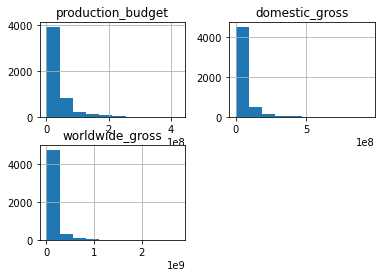

In [31]:
tn[money_cols].hist()

In [21]:
imdb_tn = imdb.reset_index().merge(tn, on=['release_year', 'clean_title'])
imdb_tn.drop(columns=['title_y', 'clean_title'], inplace=True)
imdb_tn.rename(columns={'title_x': 'title'}, inplace=True)

<AxesSubplot:ylabel='title'>

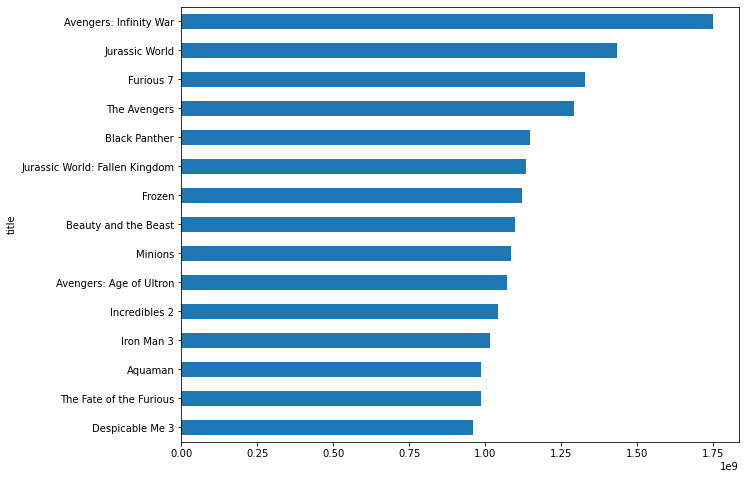

In [22]:
imdb_tn['worldwide_profit'] = imdb_tn.eval('worldwide_gross - production_budget')
imdb_tn['domestic_profit'] = imdb_tn.eval('domestic_gross - production_budget')
top_profit = imdb_tn[['title','worldwide_profit']].sort_values('worldwide_profit').tail(15)
top_profit.set_index('title').plot.barh(figsize=(10, 8), legend=False)

In [23]:
imdb_tn['profit_decile'] = pd.qcut(imdb_tn['worldwide_profit'], 10, labels=range(10))
imdb_tn['genres'] = imdb_tn.loc[:, 'genres'].map(sorted).str.join(', ')

<AxesSubplot:>

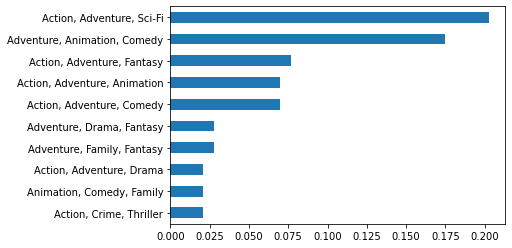

In [24]:
imdb_tn.query('profit_decile == 9')['genres'].value_counts(normalize=True).head(10)[::-1].plot.barh()

<AxesSubplot:>

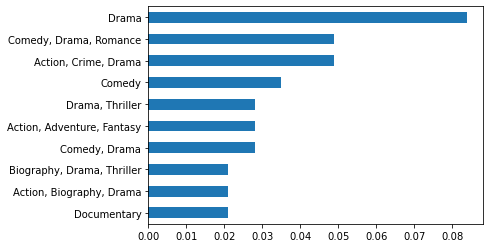

In [25]:
imdb_tn.query('profit_decile == 0')['genres'].value_counts(normalize=True).head(10)[::-1].plot.barh()

In [26]:
imdb_tn['genres'] = imdb_tn.loc[:, 'genres'].str.split(', ')

<AxesSubplot:>

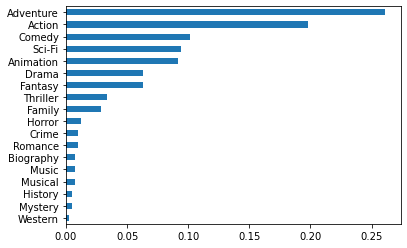

In [27]:
imdb_tn.explode('genres').query('profit_decile == 9')['genres'].value_counts(normalize=True)[::-1].plot.barh()

<AxesSubplot:>

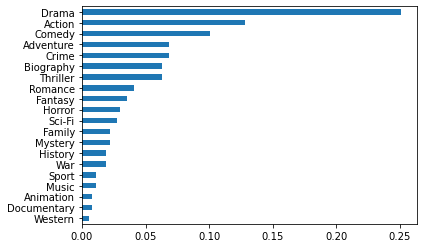

In [28]:
imdb_tn.explode('genres').query('profit_decile == 0')['genres'].value_counts(normalize=True)[::-1].plot.barh()

<AxesSubplot:>

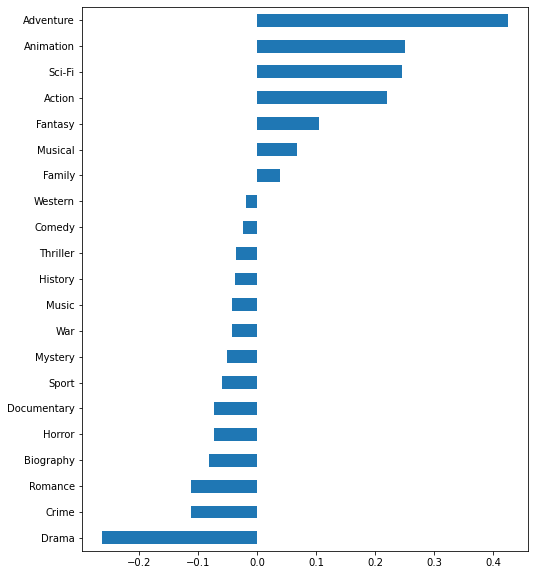

In [36]:
combos = analysis.expl_combo_table(imdb_tn.set_index('tconst'), 'genres')
combos.corrwith(imdb_tn.set_index('tconst')['worldwide_profit']).sort_values().plot.barh(figsize=(8, 10))

<AxesSubplot:>

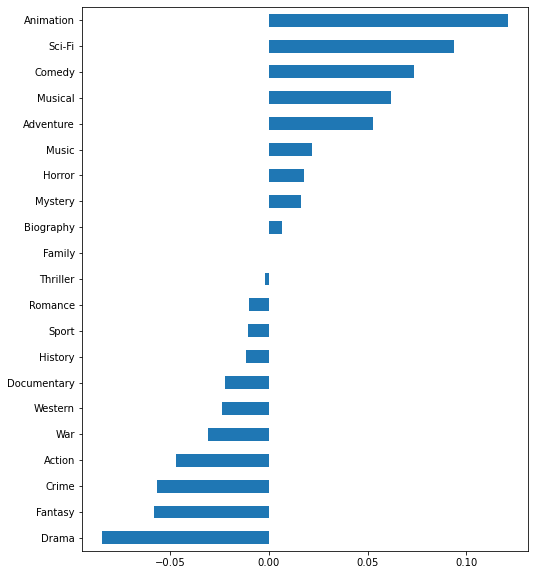

In [34]:
combos.corrwith(imdb_tn.set_index('tconst')['domestic_profit']).sort_values().plot.barh(figsize=(8, 10))

<AxesSubplot:ylabel='profit_decile'>

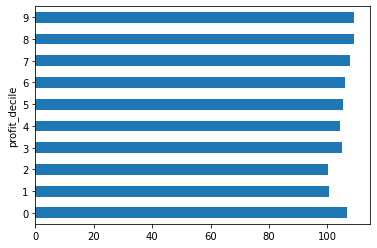

In [30]:
imdb_tn[['runtime_minutes', 'profit_decile']].groupby('profit_decile').mean().plot.barh(legend=False)